<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-35/blob/main/Semana_4_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 4 - Actividad 1**
Maestría en Inteligencia Artificial Aplicada

**Curso:** Ciencia y analítica de datos

Tecnológico de Monterrey


**Profesor Titular:**
- Jobish Vallikavungal Devassia

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de los estudiantes:**
- Alejandra Mendoza Flores - A01793032
- Fernando Sebastian Sanchez Cardona - A01687530

**Fecha:** 

11 de octubre del 2022

#**Parte 1: Ejercicio guiado**

Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos 

- Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.
Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

- Paso 2: Interprete cada componente principal en términos de las variables originales
Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

- Paso 3: Identifique valores atípicos
Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

### **Importar librerías**

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing


sns.set(style="whitegrid", rc={'figure.dpi': 95}, font_scale=0.7)

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv')
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
  - X6 = the repayment status in September,2005; 
  - X7 = the repayment status in August, 2005; 
  . . .
  - X11 = the repayment status in April, 2005. 
  
  The measurement scale for the repayment status is: 
  - -1 = pay duly 
  - 1 = payment delay for one month
  - 2 = payment delay for two months
  . . .
  - 8 = payment delay for eight months
  - 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar).
  - X12 = amount of bill statement in September, 2005; 
  - X13 = amount of bill statement in August, 2005; . . .; 
  - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
  - X18 = amount paid in September, 2005
  - X19 = amount paid in August, 2005
  . . .
  - X23 = amount paid in April, 2005. 

### **Arreglar datos**

**Renombrar columnas**

In [116]:
column_names = {
    'ID': 'id',
    'X1': 'credit',
    'X2': 'gender',
    'X3': 'education',    
    'X4': 'marital_status',
    'X5': 'age', 
    'X6': 'payment_2005_09', 
    'X7': 'payment_2005_08', 
    'X8': 'payment_2005_07', 
    'X9': 'payment_2005_06', 
    'X10': 'payment_2005_05', 
    'X11': 'payment_2005_04', 
    'X12': 'bill_2005_09', 
    'X13': 'bill_2005_08', 
    'X14': 'bill_2005_07', 
    'X15': 'bill_2005_06', 
    'X16': 'bill_2005_05', 
    'X17': 'bill_2005_04', 
    'X18': 'pay_amt_2005_09', 
    'X19': 'pay_amt_2005_08', 
    'X20': 'pay_amt_2005_07', 
    'X21': 'pay_amt_2005_06', 
    'X22': 'pay_amt_2005_05', 
    'X23': 'pay_amt_2005_04', 
    'Y': 'default'
              }
df.rename(columns= column_names, inplace=True)

**Observar primeros 5 filas del sataset**

In [117]:
df.head()

,id,credit,gender,education,marital_status,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**Información del dataser**

In [118]:
df.describe()

,id,credit,gender,education,marital_status,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,...,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04,default
count,30000.000000,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,15000.500000,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,8660.398374,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


**Reemplazar la edad con el promedio de la edad**

In [119]:
df['age'].fillna(df['age'].mean(),inplace=True)

**Los valores de las columnas X6 a X11 van del  -1 a 9. El dataset contiene valores fuera de este rango, se convertirá el valor -2 a -1**

In [120]:
df['payment_2005_09'] = df['payment_2005_09'].replace(-2, -1)
df['payment_2005_08'] = df['payment_2005_08'].replace(-2, -1)
df['payment_2005_07'] = df['payment_2005_07'].replace(-2, -1)
df['payment_2005_06'] = df['payment_2005_06'].replace(-2, -1)
df['payment_2005_05'] = df['payment_2005_05'].replace(-2, -1)
df['payment_2005_04'] = df['payment_2005_04'].replace(-2, -1)

**Se interpretaron los valores nulos como no realizados, se cambiarán los valores a 0**

In [121]:
df['payment_2005_09'].fillna(0, inplace=True)
df['payment_2005_08'].fillna(0, inplace=True)
df['payment_2005_07'].fillna(0, inplace=True)
df['payment_2005_06'].fillna(0, inplace=True)
df['payment_2005_05'].fillna(0, inplace=True)
df['payment_2005_04'].fillna(0, inplace=True)


**Si el monto del estado de cuenta es nulo, no hay cobro que hacer, se cambiarán los valores a 0**

In [122]:
df['bill_2005_09'].fillna(0, inplace=True)
df['bill_2005_08'].fillna(0, inplace=True)
df['bill_2005_07'].fillna(0, inplace=True)
df['bill_2005_06'].fillna(0, inplace=True)
df['bill_2005_05'].fillna(0, inplace=True)
df['bill_2005_04'].fillna(0, inplace=True)

**Los montos del pago nulos representan que no se hizo pago, se cambiarán los valores a 0**

In [123]:
df['pay_amt_2005_09'].fillna(0, inplace=True)
df['pay_amt_2005_08'].fillna(0, inplace=True)
df['pay_amt_2005_07'].fillna(0, inplace=True)
df['pay_amt_2005_06'].fillna(0, inplace=True)
df['pay_amt_2005_05'].fillna(0, inplace=True)
df['pay_amt_2005_04'].fillna(0, inplace=True)

**El defaut es 0 o 1**

In [124]:
df = df[df['default'].notna()]

**Se utlizará la función para gráficar los outliers**

In [125]:
def plot_box_plot(x, y, cat, size, df): 
  '''
  Función para gráficas boxplot
  x: variable en el eje x
  y: variable en el eje y
  cat: variable categorica
  size: tamaño de la figura
  df: dataframe
  '''
  fig, ax1 = plt.subplots(ncols=1, figsize=size)
  sns.boxplot(
    ax=ax1,
    x=x, y=y, hue=cat, data=df, 
    palette='Set1'
  )
  plt.show()

**Se definió función para obtener las variables más importantes**

In [126]:
def get_most_important_features(model, feature_names):
  '''
  Función para obtener las variables más importantes
  model: modelo
  feature_names: nombre de las variables

  return: dataframe con las variables más importantes
  '''
  n_pcs= model.components_.shape[0]
  most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
  initial_feature_names = feature_names
  most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
  dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
  return pd.DataFrame(dic.items())

**Eliminar columnas que no son de utilidad**

In [127]:
ndf = df.drop(columns=['gender', 'education', 'marital_status', 'default'])
ndf.head()

,id,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,...,bill_2005_07,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04
0,1,20000,24.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,3913.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


**Confirmar que ya no se tienen valores nulos**

In [128]:
ndf.isna().values.any()

False

### **Correlación**

**Crear correlación entre la columna "credit" y "age"**

In [129]:
df_credit_age = ndf[['credit','age']]
df_credit_age.corr()

,credit,age
credit,1.000000,0.144714
age,0.144714,1.000000


**Heatmap de la correlación**

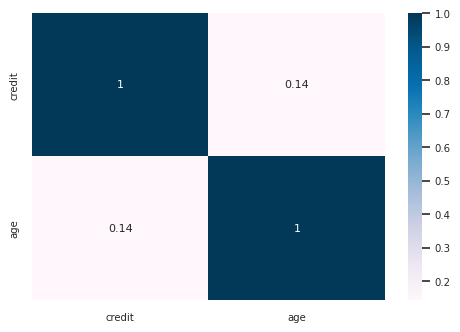

In [130]:
sns.heatmap(df_credit_age.corr(), annot=True, cmap='PuBu')

**Crear correlación entre la columna "credit" y "pay_amt_2005_09"**

In [139]:
df_credit_pay_amt = ndf[['credit','pay_amt_2005_08']]
df_credit_pay_amt.corr()

,credit,pay_amt_2005_08
credit,1.000000,0.178392
pay_amt_2005_08,0.178392,1.000000


**Heatmap de la correlación**

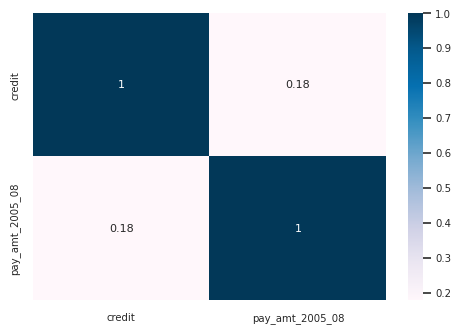

In [140]:
sns.heatmap(df_credit_pay_amt.corr(), annot=True, cmap='PuBu')

**Crear correlación entre la columna "credit" y "bill_2005_09"**

In [141]:
df_credit_bill = ndf[['credit', 'bill_2005_09']]
df_credit_bill.corr()

,credit,bill_2005_09
credit,1.000000,0.285453
bill_2005_09,0.285453,1.000000


**Heatmap de la correlación**

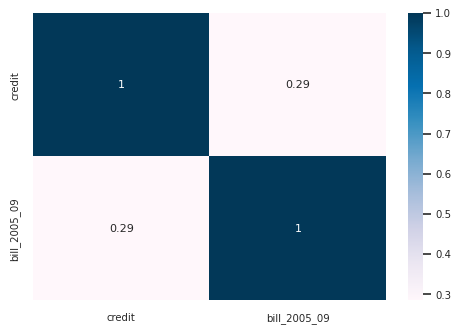

In [142]:
sns.heatmap(df_credit_bill.corr(), annot=True, cmap='PuBu')

### **Promedios**

**Promedio del crédito de la columna "credit", con dos decimales**

In [143]:
ndf.credit.mean().round(2)

167496.07

**Promedio del crédito de la columna "bill_2005_09", con dos decimales**

In [144]:
ndf.bill_2005_09.mean().round(2)

51221.82

### **Matriz de covarianza**

**Revisar matriz de covarianza**

In [145]:
varianza = np.cov([ndf.credit, ndf.bill_2005_09])
varianza

array([[1.68347521e+10, 2.72744844e+09],
       [2.72744844e+09, 5.42295604e+09]])

In [146]:
credit_bill_df = ndf [['credit', 'bill_2005_09']]
credit_bill_df.var().sum()

22257708146.414627

In [147]:
varianzaTotal = credit_bill_df.var().sum()
varianzaCredit = varianza[0][0]
varianzaBill = varianza[1][1]

In [148]:
print('Varianza Total:', varianzaTotal.round(2))
print('Varianza de Credito:', ((varianzaCredit/varianzaTotal)*100).round(2), '%')
print('Varianza de Cuentas:', ((varianzaBill/varianzaTotal)*100).round(2), '%')

Varianza Total: 22257708146.41
Varianza de Credito: 75.64 %
Varianza de Cuentas: 24.36 %


In [152]:
ndf.corr().round(2)

,id,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,...,bill_2005_07,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04
id,1.00,0.03,0.02,-0.02,-0.00,-0.01,0.01,-0.02,-0.01,0.02,...,0.02,0.04,0.02,0.02,0.01,0.01,0.04,0.01,0.00,0.00
credit,0.03,1.00,0.14,-0.25,-0.28,-0.27,-0.26,-0.24,-0.23,0.29,...,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22
age,0.02,0.14,1.00,-0.03,-0.04,-0.04,-0.04,-0.04,-0.04,0.06,...,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02
payment_2005_09,-0.02,-0.25,-0.03,1.00,0.67,0.55,0.51,0.48,0.44,0.16,...,0.15,0.15,0.16,0.16,-0.09,-0.07,-0.07,-0.06,-0.06,-0.06
payment_2005_08,-0.00,-0.28,-0.04,0.67,1.00,0.72,0.60,0.57,0.52,0.20,...,0.19,0.19,0.19,0.19,-0.11,-0.07,-0.07,-0.05,-0.04,-0.05
payment_2005_07,-0.01,-0.27,-0.04,0.55,0.72,1.00,0.73,0.63,0.58,0.17,...,0.18,0.19,0.19,0.19,-0.02,-0.09,-0.07,-0.06,-0.05,-0.05
payment_2005_06,0.01,-0.26,-0.04,0.51,0.60,0.73,1.00,0.78,0.67,0.16,...,0.20,0.20,0.20,0.20,-0.03,-0.02,-0.10,-0.06,-0.05,-0.04
payment_2005_05,-0.02,-0.24,-0.04,0.48,0.57,0.63,0.78,1.00,0.77,0.17,...,0.20,0.23,0.23,0.22,-0.03,-0.02,-0.01,-0.09,-0.05,-0.04
payment_2005_04,-0.01,-0.23,-0.04,0.44,0.52,0.58,0.67,0.77,1.00,0.17,...,0.20,0.22,0.25,0.24,-0.02,-0.02,-0.01,-0.00,-0.08,-0.04
bill_2005_09,0.02,0.29,0.06,0.16,0.20,0.17,0.16,0.17,0.17,1.00,...,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18


In [153]:
credit_bill_df.corr().round(2)

,credit,bill_2005_09
credit,1.00,0.29
bill_2005_09,0.29,1.00


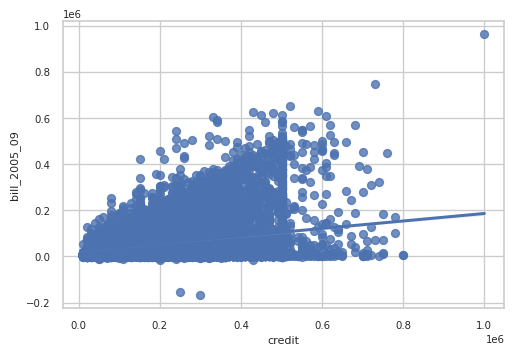

In [154]:
plot = sns.regplot(data=df, x=df.credit, y=df.bill_2005_09)
plot

In [155]:
pcs = PCA(n_components=2)
pcs.fit(ndf[['credit', 'bill_2005_09']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,132110.229399,0.784138,0.784138
1,69315.189062,0.215862,1.000000


In [156]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,132110.23,69315.19
Proportion of variance,0.78,0.22
Cumulative proportion,0.78,1.00


In [157]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,132110.2294,69315.1891
Proportion of variance,0.7841,0.2159
Cumulative proportion,0.7841,1.0000


### **Scree Plot**

In [158]:
def do_scree_plot(pcs):
  '''
  Función para gráficas scree plot
  pcs: lista de componentes principales
  '''
  pc_components = np.arange(pcs.n_components_) + 1
  #PC_components

  _ = sns.set(style = 'whitegrid', 
              font_scale = 1.2
              )

  fig, ax = plt.subplots(figsize=(10, 7))

  _ = sns.barplot(x = pc_components, 
                  y = pcs.explained_variance_ratio_, 
                  color = 'b'
                  )

  _ = sns.lineplot(x = pc_components-1, 
                  y = np.cumsum(pcs.explained_variance_ratio_), 
                  color = 'black', 
                  linestyle = '-', 
                  linewidth = 1, 
                  marker = 'o', 
                  markersize = 8,                                  
                  )

  for x, y in zip(pc_components-1, np.cumsum(pcs.explained_variance_ratio_)):
      label = "{:.1f}".format(y*100)
      plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=9)

  plt.title('Scree Plot')
  plt.xlabel('N-th Principal Component')
  plt.ylabel('Variance Explained')
  plt.ylim(0, 1)
  plt.show()

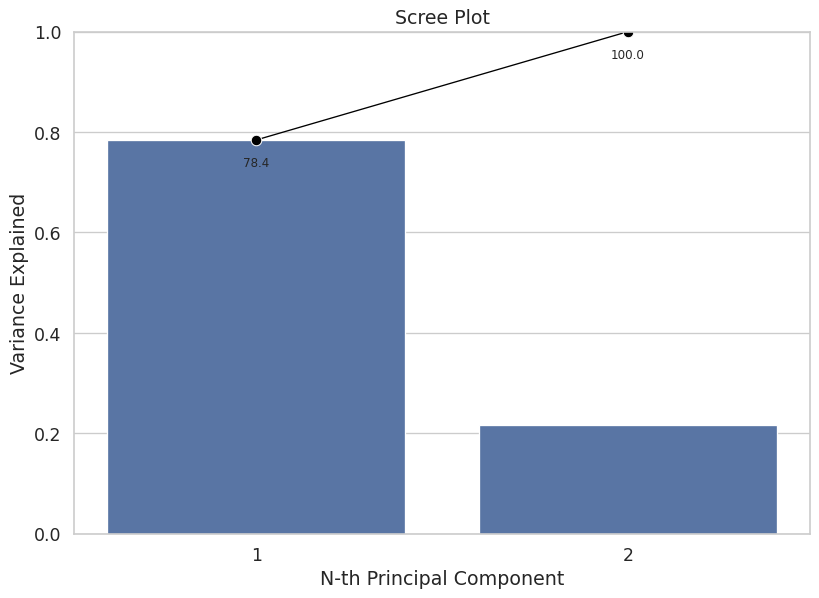

In [159]:
do_scree_plot(pcs)

In [160]:
pcs.components_.round(4)

array([[ 0.9752,  0.2211],
       [-0.2211,  0.9752]])

In [161]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['credit', 'bill_2005_09']
                                )
pcsComponents_df

,PC1,PC2
credit,0.975250,-0.221106
bill_2005_09,0.221106,0.975250


In [162]:
score = pd.DataFrame(pcs.transform(
    ndf[['credit','bill_2005_09']]
),
  columns=['x','y']
)
score.head()

,x,y
0,-154305.779942,-13525.602463
1,-57052.990191,-36836.763881
2,-80438.561921,-4303.868469
3,-115523.692802,21852.040845
4,-124008.204475,-15571.216505


In [163]:
score.x.mean()

-1.291563126446108e-11

In [164]:
score.y.sum()

5.029141902923584e-08

In [165]:
score.x.var() + score.y.var()

22257708146.414627

In [166]:
ndf.credit.var() + ndf.bill_2005_09.var()

22257708146.414627

In [167]:
((score.x.var()/
  (score.x.var()+score.y.var())
 )*100).round(0)

78.0

In [168]:
ndf.shape

(29997, 21)

In [169]:
pcs = PCA()
pcs.fit(ndf.iloc[:, 1:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Desviacion Estandar': np.sqrt(pcs.explained_variance_),
                             'Proporción de Varianza': pcs.explained_variance_ratio_,
                             'Proporción Acumulada': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4).T

,Desviacion Estandar,Proporción de Varianza,Proporción Acumulada
PC1,166528.3184,0.6105,0.6105
PC2,115828.8964,0.2953,0.9058
PC3,37237.6662,0.0305,0.9363
PC4,27731.7120,0.0169,0.9532
PC5,20687.5567,0.0094,0.9627
PC6,20267.0922,0.0090,0.9717
PC7,18512.4508,0.0075,0.9792
PC8,17030.9919,0.0064,0.9856
PC9,16283.9342,0.0058,0.9915
PC10,11609.4742,0.0030,0.9944


In [170]:
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Desviacion Estandar,166528.318369,115828.896414,37237.666242,27731.711992,20687.556674,20267.092161,18512.450782,17030.991936,16283.934212,11609.474150,10409.611001,8782.487051,8198.650883,9.116652e+00,1.743661e+00,8.447035e-01,6.549864e-01,5.441141e-01,4.807682e-01,3.943995e-01
Proporción de Varianza,0.610455,0.295333,0.030524,0.016929,0.009421,0.009042,0.007544,0.006385,0.005837,0.002967,0.002385,0.001698,0.001480,1.829568e-09,6.692708e-11,1.570675e-11,9.443702e-12,6.517149e-12,5.088025e-12,3.424132e-12
Proporción Acumulada,0.610455,0.905788,0.936312,0.953241,0.962662,0.971704,0.979248,0.985633,0.991470,0.994437,0.996822,0.998520,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


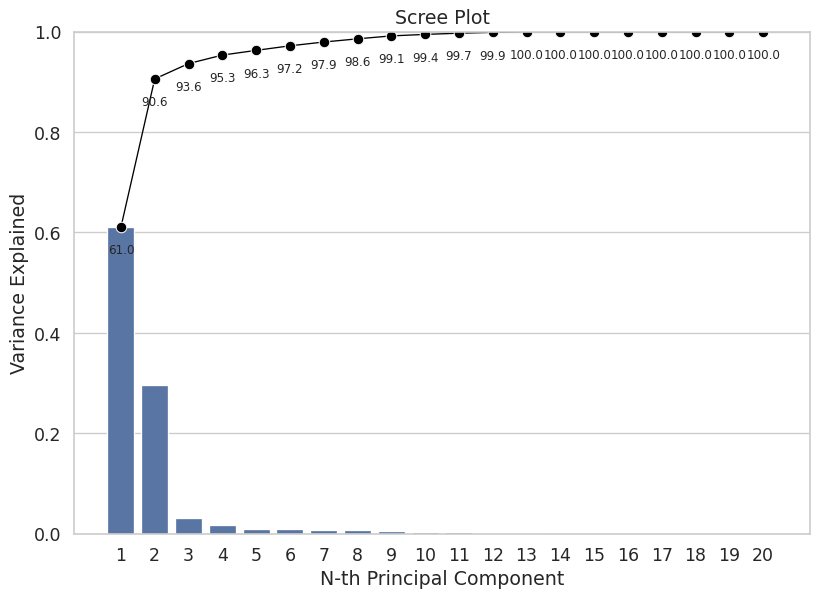

In [171]:
do_scree_plot(pcs)


In [174]:
((pcsSummary_df.iloc[2][3])*100).round(1)

95.3

In [175]:
((pcsSummary_df.iloc[2][1])*100).round(2)

90.58

In [176]:
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4).T

,Desviacion Estandar,Proporción de Varianza,Proporción Acumulada
PC1,166528.3184,0.6105,0.6105
PC2,115828.8964,0.2953,0.9058
PC3,37237.6662,0.0305,0.9363
PC4,27731.7120,0.0169,0.9532
PC5,20687.5567,0.0094,0.9627
PC6,20267.0922,0.0090,0.9717
PC7,18512.4508,0.0075,0.9792
PC8,17030.9919,0.0064,0.9856
PC9,16283.9342,0.0058,0.9915
PC10,11609.4742,0.0030,0.9944


In [177]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:5].round(4).sort_values(by='PC1',ascending=False)

,PC1,PC2,PC3,PC4,PC5
credit,0.4915,0.8691,-0.0206,-0.0184,-0.0441
bill_2005_09,0.3885,-0.2213,-0.5490,-0.2050,0.3169
bill_2005_08,0.3814,-0.2264,-0.3909,-0.0376,0.0115
bill_2005_07,0.3722,-0.2165,-0.0481,0.5535,-0.2480
bill_2005_06,0.3464,-0.1940,0.2610,0.0791,-0.3672
bill_2005_05,0.3229,-0.1768,0.4281,-0.2001,-0.0157
bill_2005_04,0.3086,-0.1674,0.4837,-0.3084,0.2264
pay_amt_2005_08,0.0313,0.0108,0.1600,0.6732,0.3372
pay_amt_2005_07,0.0268,0.0110,0.1351,0.0283,0.3113
pay_amt_2005_09,0.0266,0.0057,0.0375,0.1936,0.2028


In [178]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.iloc[:, 1:].columns
                                )
pcsComponents_dfX.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
credit,0.4915,0.8691,-0.0206,-0.0184,-0.0441,0.0169,-0.0011,0.0010,0.0095,0.0038,0.0058,0.0000,0.0019,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000
age,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,1.0000,0.0019,0.0011,0.0002,0.0006,0.0002,-0.0003
payment_2005_09,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0002,0.3581,-0.6035,-0.5964,-0.3378,0.1915,-0.0309
payment_2005_08,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0006,0.4284,-0.4487,0.2269,0.5857,-0.4592,0.0988
payment_2005_07,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0010,0.4455,-0.0800,0.6231,-0.1334,0.5852,-0.2158
payment_2005_06,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0006,0.4362,0.2763,0.1448,-0.5532,-0.3882,0.5056
payment_2005_05,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0013,0.4019,0.4020,-0.2173,-0.0072,-0.2932,-0.7373
payment_2005_04,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0014,0.3713,0.4359,-0.3692,0.4680,0.4164,0.3788
bill_2005_09,0.3885,-0.2213,-0.5490,-0.2050,0.3169,0.0032,-0.4563,0.0070,0.0703,0.1725,-0.2672,-0.2048,-0.0062,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
bill_2005_08,0.3814,-0.2264,-0.3909,-0.0376,0.0115,-0.0808,0.5269,-0.0657,0.0994,0.0081,0.3507,0.4767,0.0167,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000


### **Mínimos y máximos**

In [179]:
cols = ['PC1', 'PC2', 'PC3', 'PC4']
for col in cols:
  print("%s\tMAX: %s\tMIN: %s" % (col, pcsComponents_dfX[col].idxmax(), pcsComponents_dfX[col].idxmin()))

PC1	MAX: credit	MIN: payment_2005_09
PC2	MAX: credit	MIN: bill_2005_08
PC3	MAX: bill_2005_04	MIN: bill_2005_09
PC4	MAX: pay_amt_2005_08	MIN: bill_2005_04


### **PCA con normalización de datos**

In [180]:
ndf.iloc[:, 1:].head()

,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,bill_2005_08,bill_2005_07,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04
0,20000,24.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


**Normalizar nuestros 21 atributos**

In [181]:
pcs = pd.DataFrame(preprocessing.scale(ndf.iloc[:, 1:].dropna(axis=0)))
pcs.columns = ndf.iloc[:, 1:].columns
pcs.describe().round(5)

,credit,age,payment_2005_09,payment_2005_08,payment_2005_07,payment_2005_06,payment_2005_05,payment_2005_04,bill_2005_09,bill_2005_08,bill_2005_07,bill_2005_06,bill_2005_05,bill_2005_04,pay_amt_2005_09,pay_amt_2005_08,pay_amt_2005_07,pay_amt_2005_06,pay_amt_2005_05,pay_amt_2005_04
count,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000,29997.00000
mean,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000
std,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,-1.21387,-1.57140,-1.08536,-0.95810,-0.94708,-0.93609,-0.94010,-0.91877,-2.94410,-1.67121,-2.94540,-3.31469,-2.00062,-6.35491,-0.34185,-0.25698,-0.29675,-0.30804,-0.31410,-0.29339
25%,-0.90558,-0.81195,-1.08536,-0.95810,-0.94708,-0.93609,-0.94010,-0.91877,-0.64729,-0.64908,-0.63952,-0.63637,-0.63398,-0.63162,-0.28148,-0.22087,-0.27460,-0.28928,-0.29773,-0.28681
50%,-0.21192,-0.16099,-0.07592,0.00747,0.02963,0.07686,0.12185,0.13476,-0.39176,-0.39317,-0.38822,-0.37647,-0.36532,-0.36611,-0.21506,-0.16979,-0.19451,-0.21230,-0.21592,-0.20902
75%,0.55881,0.59846,-0.07592,0.00747,0.02963,0.07686,0.12185,0.13476,0.21554,0.20845,0.18971,0.17496,0.16240,0.17350,-0.03961,-0.03998,-0.04088,-0.05189,-0.05027,-0.06839
max,6.41638,4.72119,7.99964,7.73205,7.84334,8.18040,8.61749,8.56299,12.40217,13.13267,23.31649,13.18561,14.58636,15.49444,52.40037,72.83933,50.59498,39.33043,27.60239,29.44368


In [182]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndf.iloc[:, 1:].dropna(axis=0))) 


PCA()

In [183]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4).T

,Standard deviation,Proportion of variance,Cumulative proportion
PC1,2.5102,0.3151,0.3151
PC2,2.0174,0.2035,0.5185
PC3,1.2207,0.0745,0.5931
PC4,1.0057,0.0506,0.6436
PC5,0.9664,0.0467,0.6903
PC6,0.9434,0.0445,0.7348
PC7,0.9354,0.0438,0.7786
PC8,0.8868,0.0393,0.8179
PC9,0.8668,0.0376,0.8555
PC10,0.8572,0.0367,0.8922


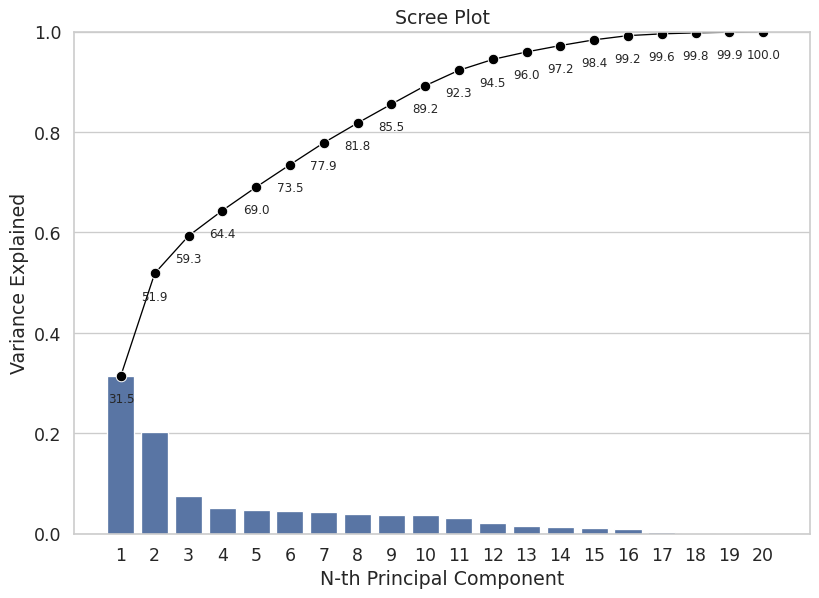

In [184]:
do_scree_plot(pcs)


In [185]:
pcsSummary_df.iloc[2,13]

0.9722669482007739

In [186]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=ndf.iloc[:, 1:].columns
                                )
pcsComponents_df.iloc[:,:13].sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
bill_2005_06,0.369194,0.110873,-0.114551,0.042916,0.091923,-0.031533,0.014116,0.120847,0.027975,0.024764,0.046965,0.006885,-0.043244
bill_2005_05,0.367146,0.108159,-0.095782,0.042220,0.057575,0.130840,-0.055079,-0.002637,-0.021747,0.053461,0.052771,-0.032874,-0.030697
bill_2005_07,0.364965,0.112918,-0.126862,0.043213,0.062919,-0.137788,0.063560,-0.127298,0.055663,0.087197,0.042051,0.032535,-0.000779
bill_2005_08,0.360584,0.107897,-0.190599,0.031135,0.018019,-0.070825,-0.049351,-0.046213,0.014117,-0.142536,0.040267,0.024575,0.016199
bill_2005_04,0.359775,0.106503,-0.085933,0.029701,-0.061189,0.130698,0.113963,0.020139,-0.067547,0.010644,0.076002,-0.056241,-0.005338
bill_2005_09,0.349072,0.108485,-0.221342,0.014868,-0.051703,-0.025331,-0.053500,0.003461,0.046040,-0.004389,0.045079,0.042317,0.018272
payment_2005_05,0.173735,-0.355873,0.159075,-0.032981,0.095813,-0.058284,0.026096,0.121472,-0.352636,0.117359,0.010614,-0.169513,-0.104707
payment_2005_04,0.169795,-0.330309,0.151587,-0.012624,0.133122,0.058937,-0.042414,0.061725,-0.388546,0.149155,0.060969,-0.366770,0.503788
payment_2005_06,0.168949,-0.367584,0.142110,-0.051421,0.013454,-0.068382,0.016576,-0.051168,-0.237754,0.055285,-0.041747,0.218179,-0.588227
payment_2005_07,0.163220,-0.362349,0.104618,-0.050087,-0.075671,-0.003803,-0.025769,-0.030220,0.051349,-0.155127,-0.097436,0.594544,0.014285


In [187]:
pcsComponents_df.PC1.idxmax()

'bill_2005_06'

In [188]:
pcsComponents_df.PC1.nlargest(5)

bill_2005_06    0.369194
bill_2005_05    0.367146
bill_2005_07    0.364965
bill_2005_08    0.360584
bill_2005_04    0.359775
Name: PC1, dtype: float64

In [189]:
pcsComponents_df.PC2.idxmin()

'payment_2005_06'

In [190]:
pcsComponents_df.PC2.nsmallest(3)

payment_2005_06   -0.367584
payment_2005_07   -0.362349
payment_2005_05   -0.355873
Name: PC2, dtype: float64

#**Parte 1: Parte 1**

- Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

- Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [205]:
((pcsSummary_df.iloc[2][3])*100).round(1)

64.4

- Para el modelo escalado con 13 componentes se explica el $95.95\%$ de la varianza

In [193]:
(pcsSummary_df.iloc[2,12] * 100).round(2)

95.95

#**Parte 1: Parte 2**

- Examine la magnitud y la dirección de los coeficientes de las variables originales.

- Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [194]:
vars = ['credit',  'bill_2005_04',  'bill_2005_05',  'bill_2005_07',  'bill_2005_08',  'bill_2005_09', 'pay_amt_2005_08']

Text(0.5, 1.0, 'Correlation matrix')

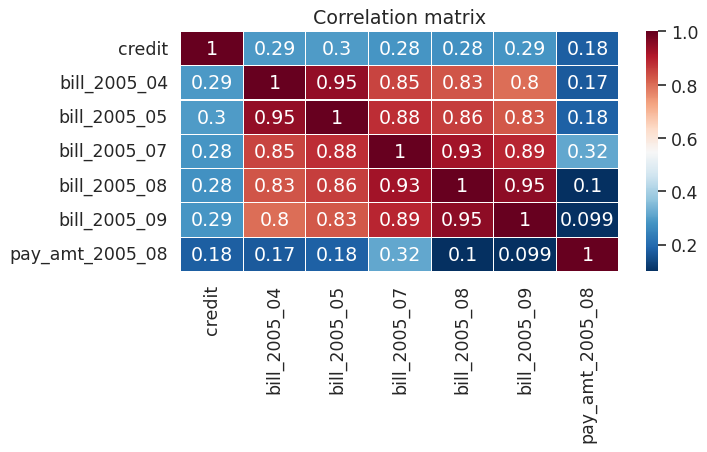

In [195]:
corr_df = ndf[vars].corr()
fig, ax = plt.subplots(figsize=(8, 5))
fig.set_tight_layout(True)
sns.heatmap(corr_df, cmap='RdBu_r', annot=True, ax=ax, linewidths=0.1).set_title('Correlation matrix')

In [196]:
pcsComponents_df.iloc[:, :4].round(4).sort_values(by='PC4', ascending=False, key=abs)

,PC1,PC2,PC3,PC4
age,0.0187,0.0590,-0.0245,-0.9505
credit,0.0918,0.2931,0.0597,-0.2325
pay_amt_2005_04,0.0775,0.1249,0.2979,-0.0722
pay_amt_2005_08,0.0865,0.1363,0.4406,0.0713
pay_amt_2005_09,0.1025,0.1457,0.4025,0.0699
pay_amt_2005_05,0.0831,0.1337,0.2611,-0.0677
payment_2005_09,0.1362,-0.3145,0.0215,-0.0624
payment_2005_08,0.1604,-0.3514,0.0498,-0.0558
payment_2005_06,0.1689,-0.3676,0.1421,-0.0514
payment_2005_07,0.1632,-0.3623,0.1046,-0.0501


**Análisis de los componentes principales de las variables principales originales**

Se muestra de los 4 componentes principales, los 4 atributos con mayor peso en cada uno de ellos.


| Componente | Atributo 1 | Atributo 2 | Atributo 3 | Atributo 4 |
| --- | --- | --- | --- | --- |
| PC1 | credit (0.4915) | bill_2005_09 (0.3885) | bill_2005_08 (0.3814) | bill_2005_07 (0.3722) |
| PC2 | credit (0.8691) | bill_2005_08 (-0.2264) | bill_2005_09 (-0.2213) | bill_2005_07 (-0.2165) |
| PC3 | bill_2005_09 (-0.5490) | bill_2005_04 (0.4837) | bill_2005_05 (0.4281) | bill_2005_08 (-0.3909) |
| PC4 | pay_amt_2005_08 (0.6732) | bill_2005_07 (0.5535) | bill_2005_04 (-0.3084) | bill_2005_09 (-0.2050) |



#**Parte 1: Parte 3**

- Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. 
- Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

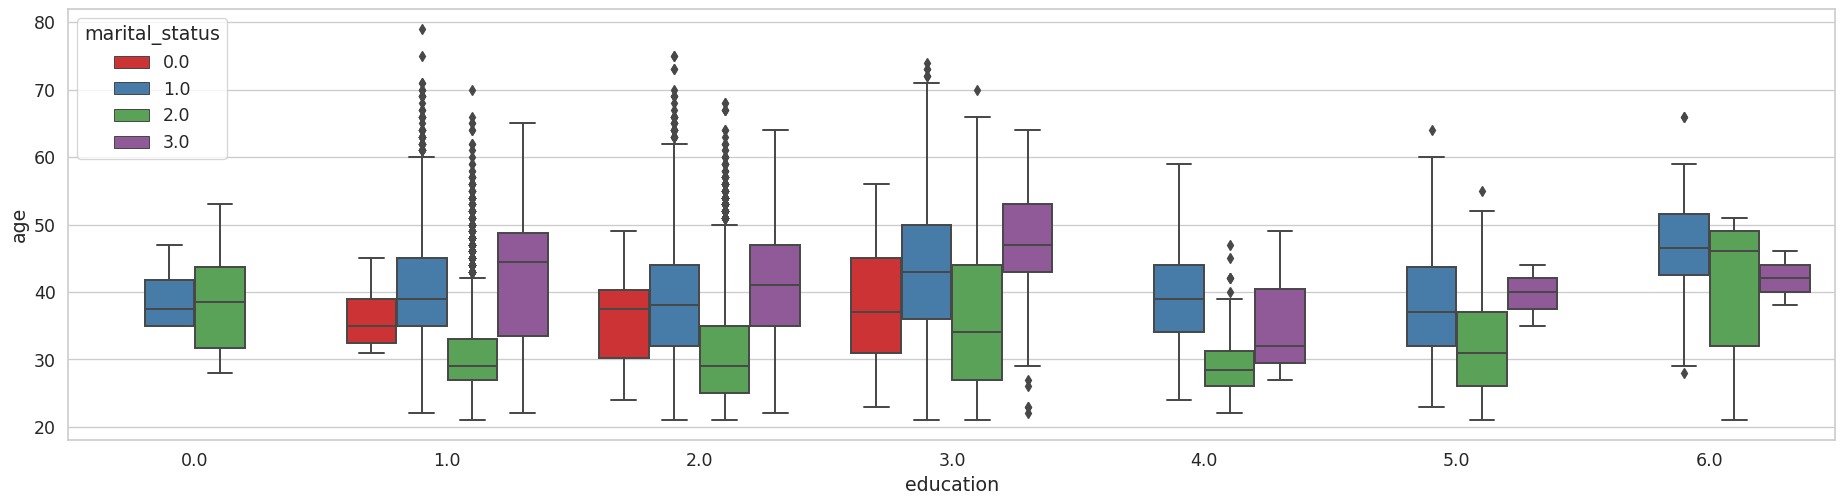

In [ ]:
plot_box_plot('education', 'age', 'marital_status', (24, 6), df)

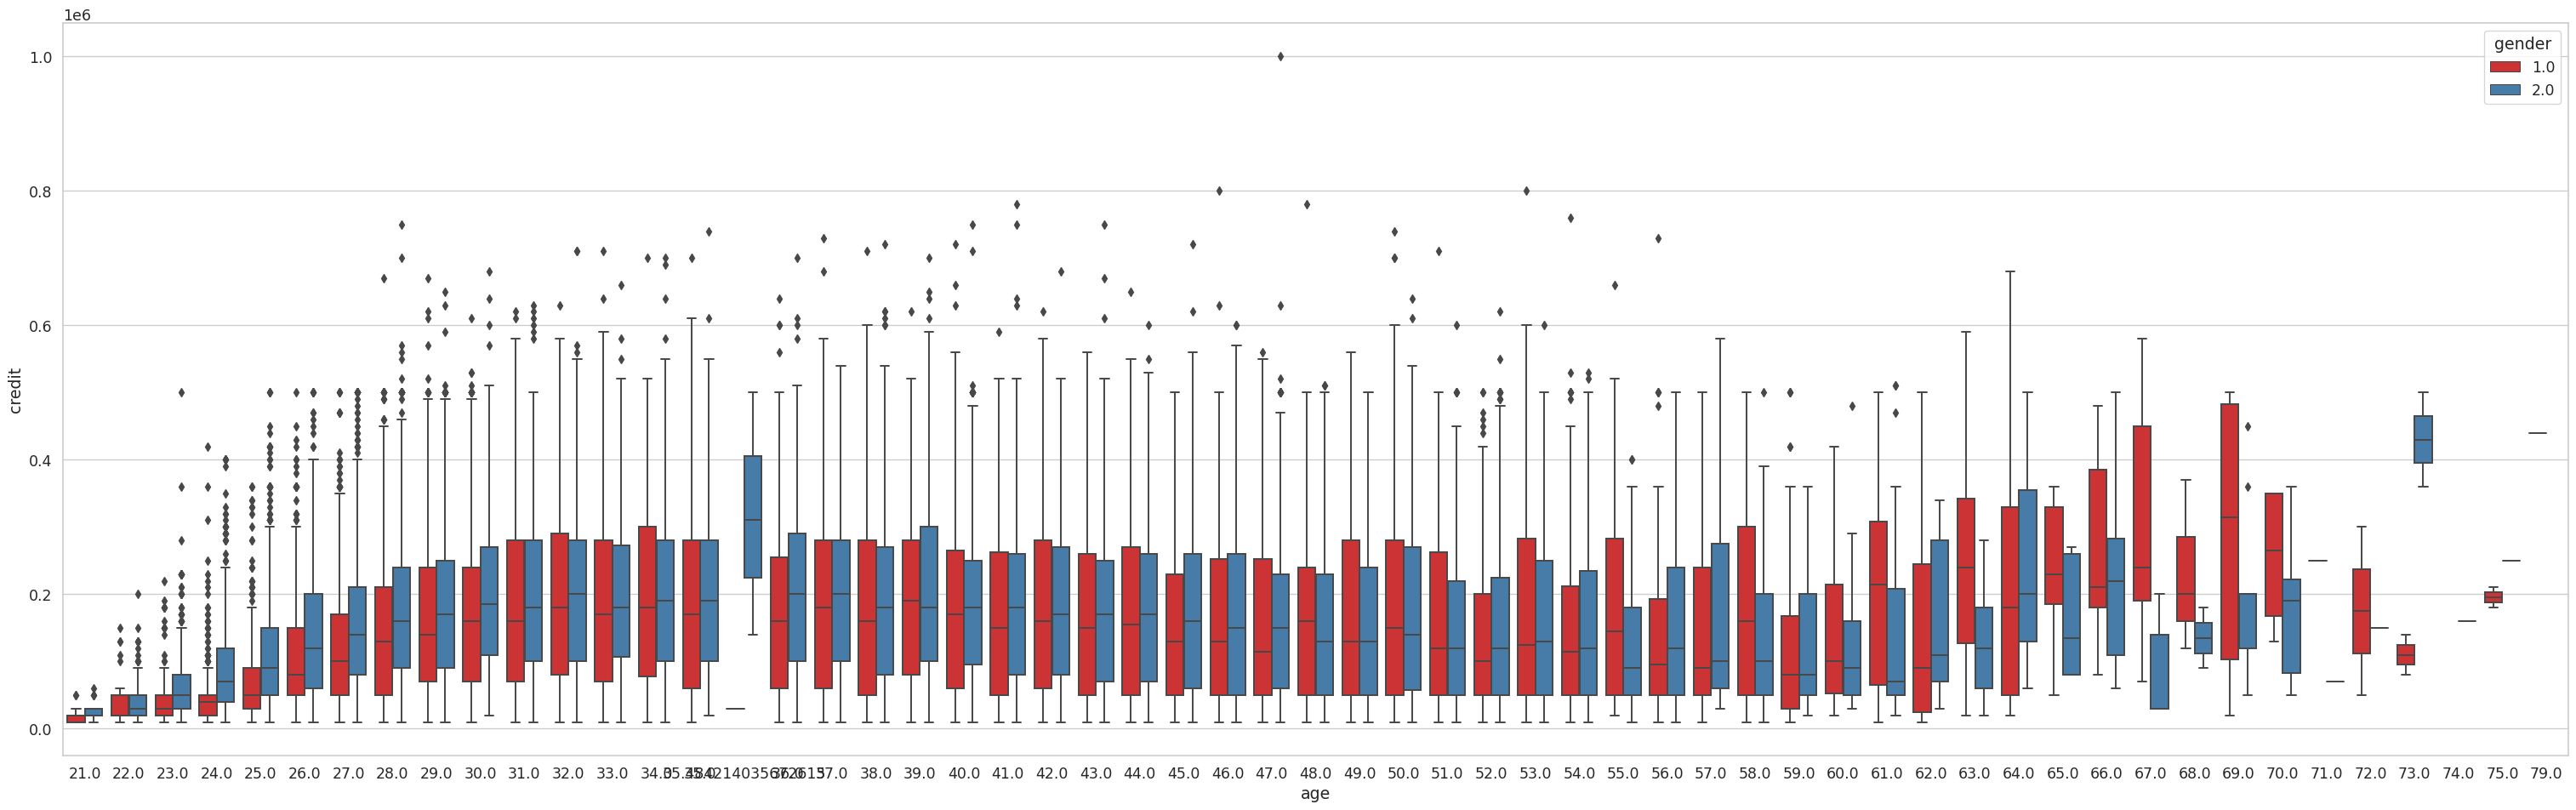

In [ ]:
plot_box_plot('age', 'credit', 'gender', (40, 12), df)


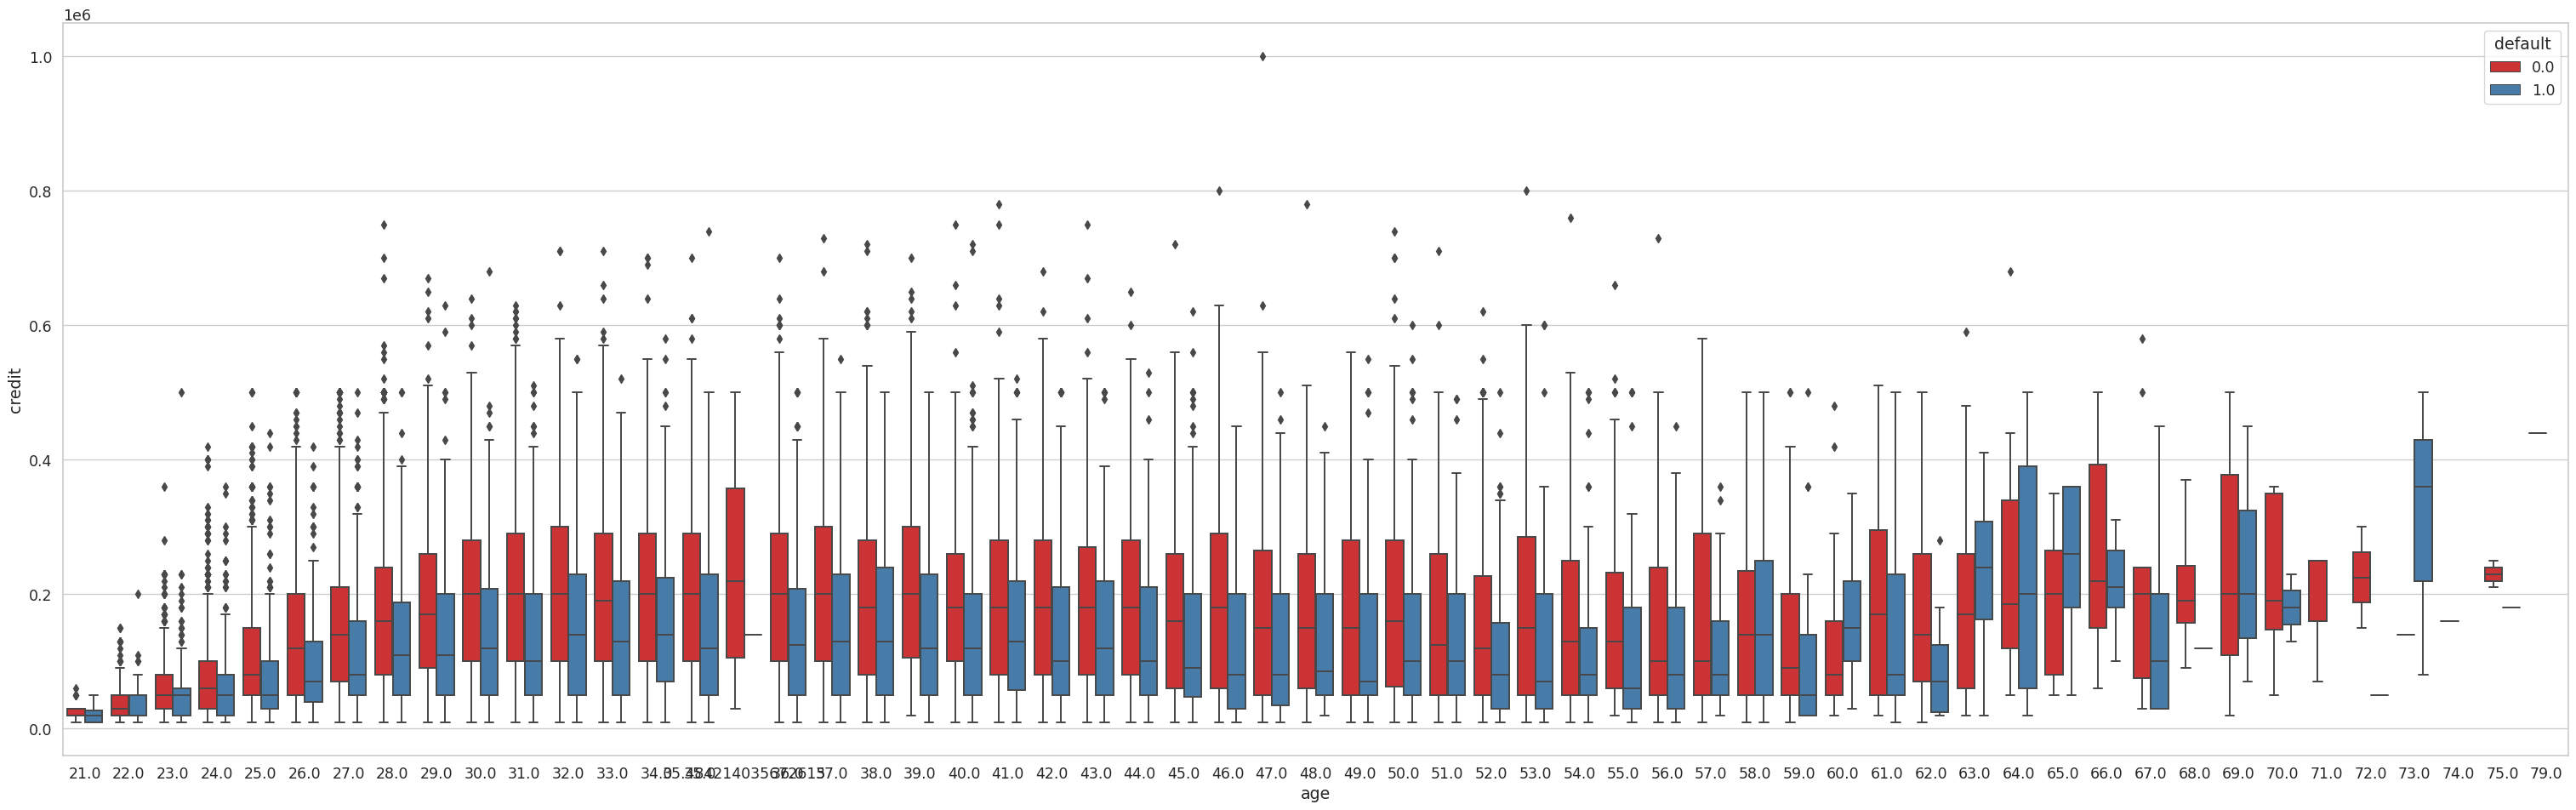

In [ ]:
plot_box_plot('age', 'credit', 'default', (40, 12), df)

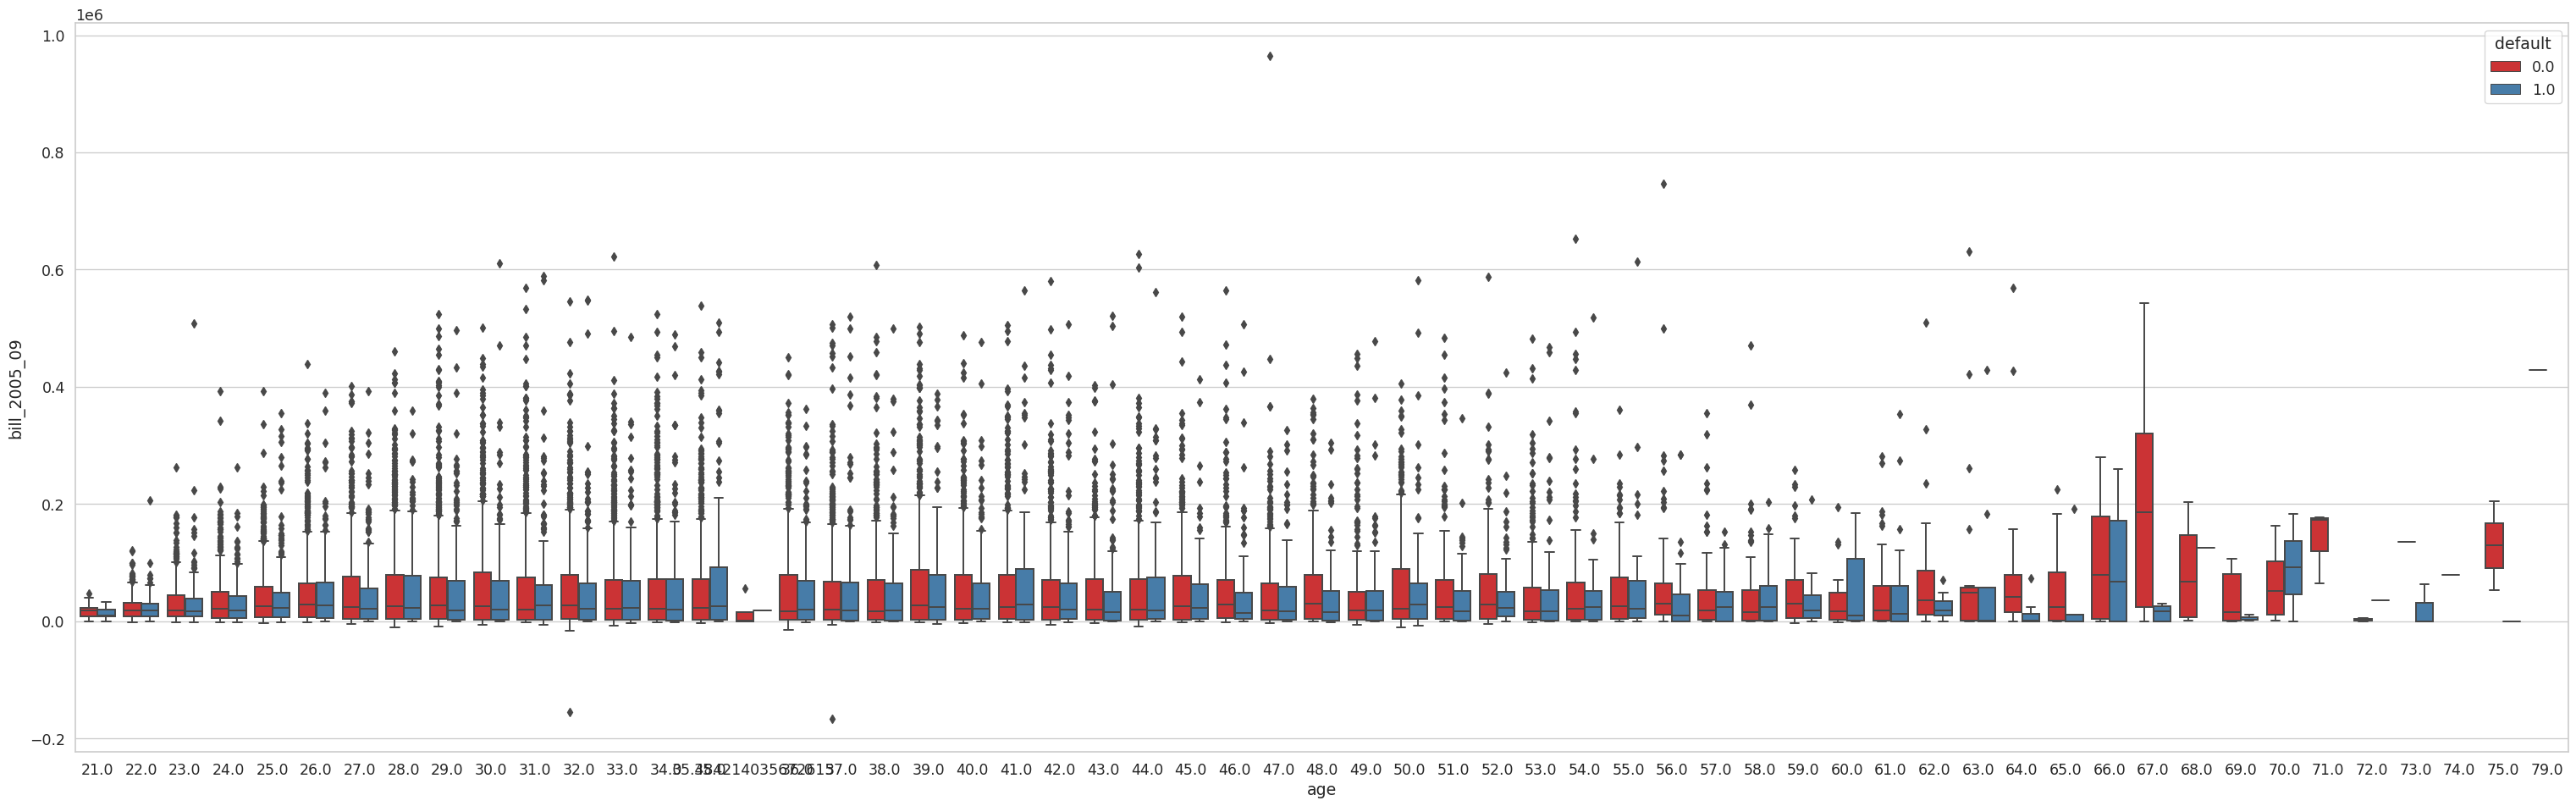

In [ ]:
plot_box_plot('age', 'bill_2005_09', 'default', (40, 12), df)

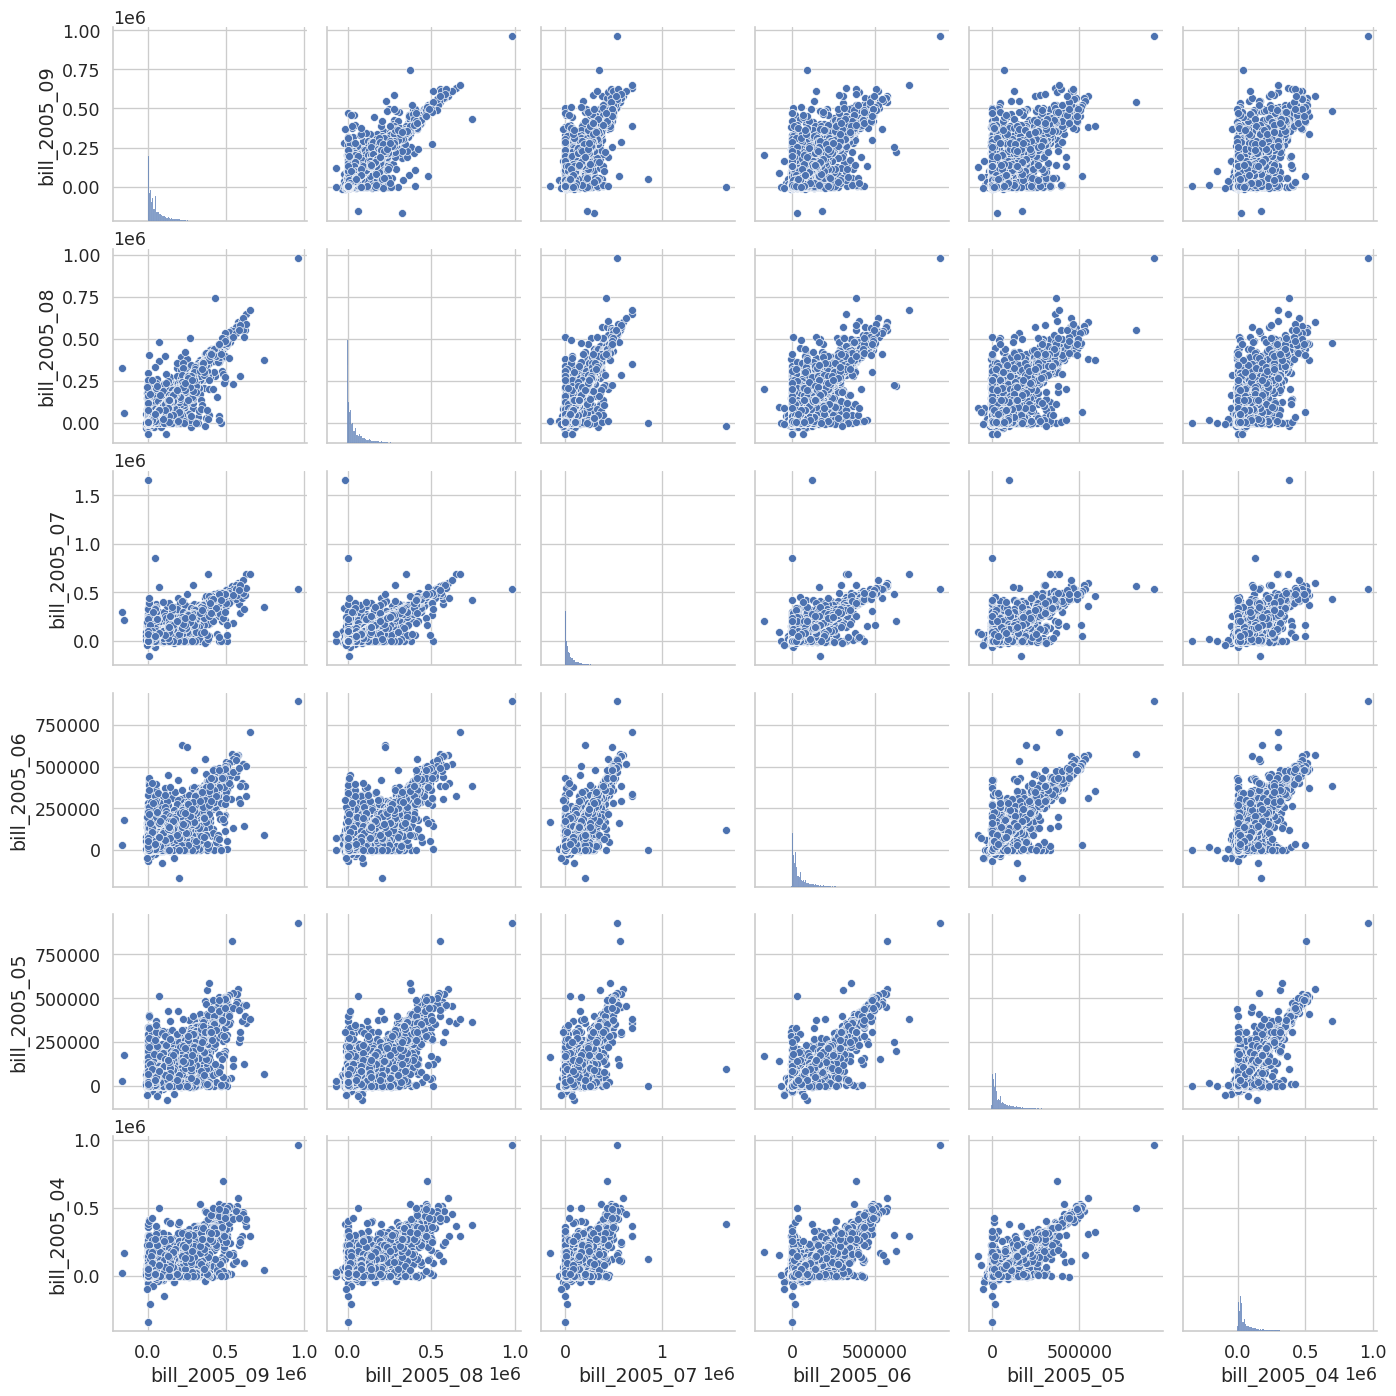

In [ ]:
bill_amt_df = ndf[['bill_2005_09', 'bill_2005_08', 'bill_2005_07', 'bill_2005_06', 'bill_2005_05', 'bill_2005_04']]
sns.pairplot(data=bill_amt_df)

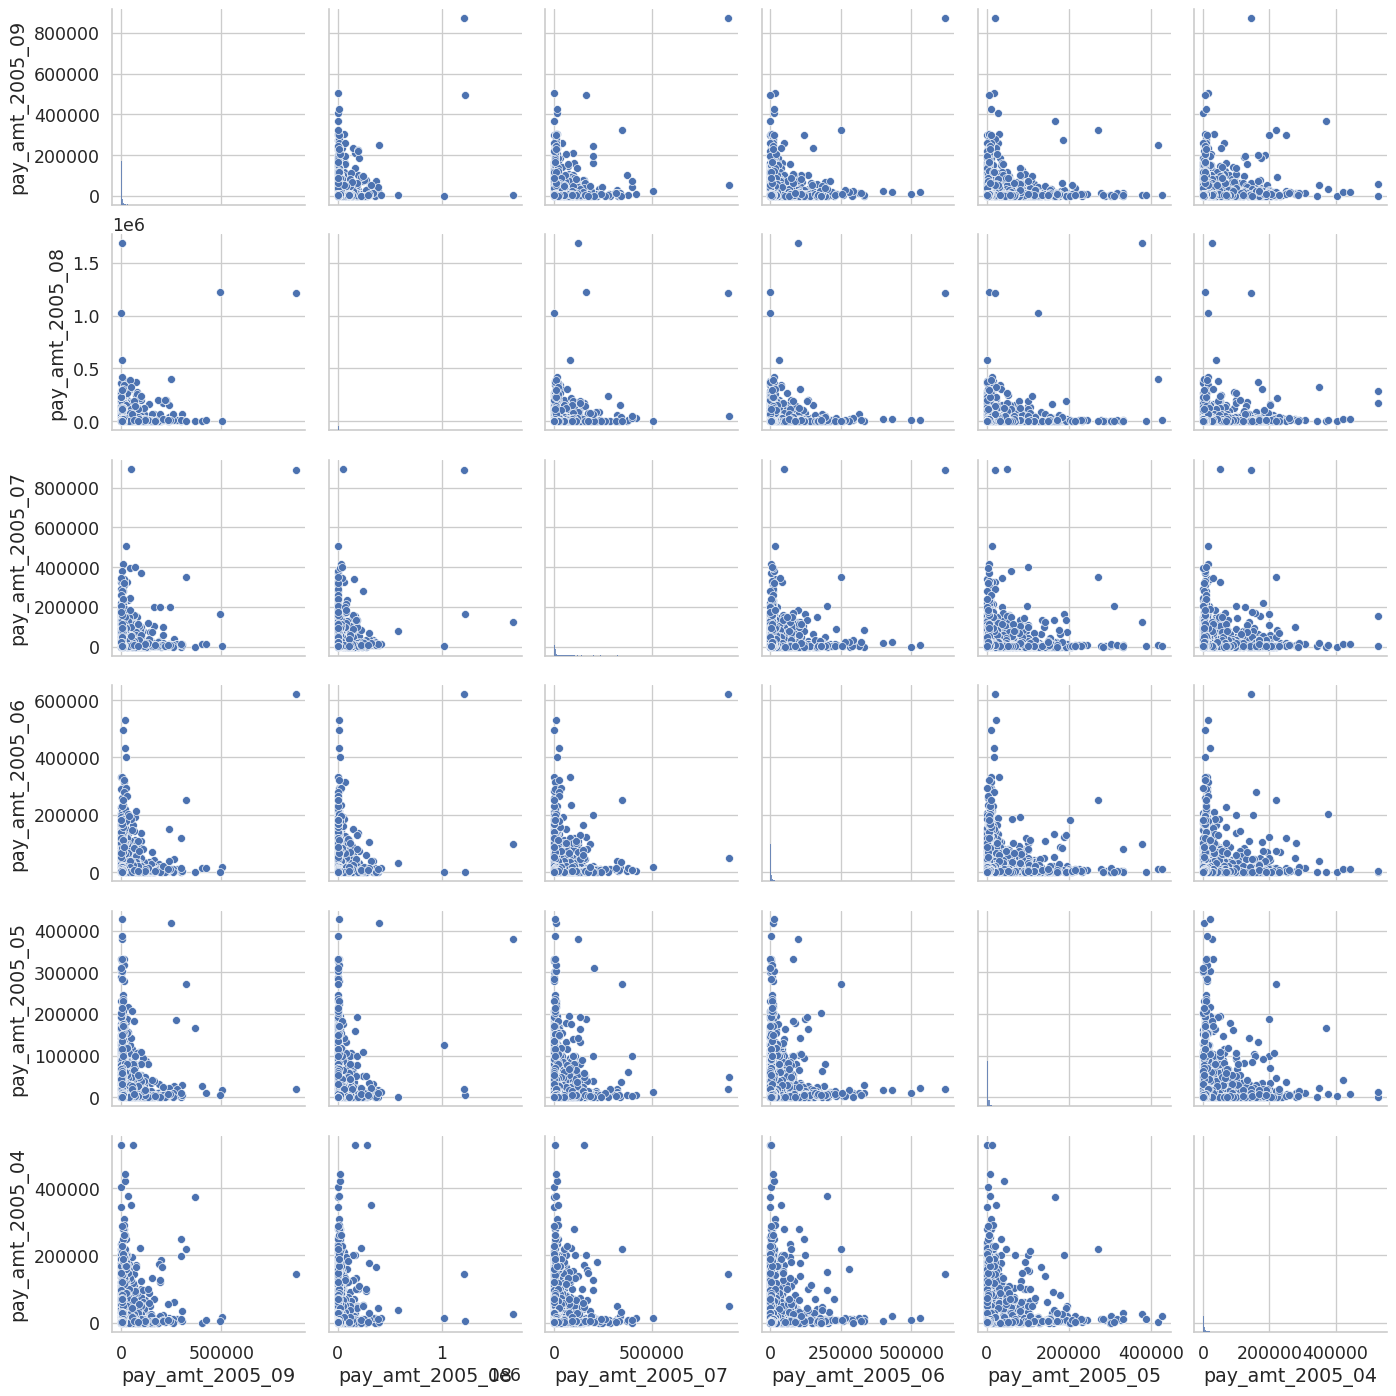

In [ ]:
pay_amt_df = ndf[['pay_amt_2005_09', 'pay_amt_2005_08', 'pay_amt_2005_07', 'pay_amt_2005_06', 'pay_amt_2005_05', 'pay_amt_2005_04']]
sns.pairplot(data=pay_amt_df)

#**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

- ¿Cuál es el número de componentes mínimo y por qué?
El número mínimo de componentes son 13, debido a que capturan el  95.95%  de la varianza

- ¿Cuál es la variación de los datos que representan esos componentes?
95.95%

- ¿Cuál es la pérdida de información después de realizar PCA?
  - Análisis sin normalización de datos: Hay 4 componentes principales los cuales capturan  95.32% de la varianza
  - Análisis con la normalización:  Hay 13 principales, se obtiene un porcentaje de varianza similar, el reducir a 4 componentes principales reduciría a  64.36%  la varianza.
- Se perdería: 95.95%  -  64.36%  =  31.59%  de la varianza.

- De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
| FACTOR | CONTRIB. MÁXIMO | CONTRIB. MÍNIMO |
| --- | --- | --- |
| PC1 | credit|  pay_status_2005_09 |
| PC2 | credit|  bill_2005_08 |
| PC3 | bill_2005_04|  bill_2005_09 |
| PC4 | pay_amt_2005_08|  bill_2005_04 |


- ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?